In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Define the oracle function
def oracle(case="balanced"):
    qc = QuantumCircuit(2)
    if case == "balanced":
        qc.cx(0, 1)
    # For a constant oracle, we do nothing
    return qc.to_gate(label="Oracle")

# Create the Deutsch-Jozsa circuit
def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Prepare the initial state
    qc.x(1)
    qc.h([0, 1])

    # Apply the oracle
    qc.append(oracle(oracle_type), [0, 1])

    # Apply Hadamard to the first qubit and measure
    qc.h(0)
    qc.measure(0, 0)

    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for both constant and balanced oracles
constant_result = deutsch_algorithm('constant')
balanced_result = deutsch_algorithm('balanced')

print(f"Constant Oracle Result: {constant_result}")
print(f"Balanced Oracle Result: {balanced_result}")


Constant Oracle Result: {'0': 1}
Balanced Oracle Result: {'1': 1}


This code proves what we need to kno

Initial state:


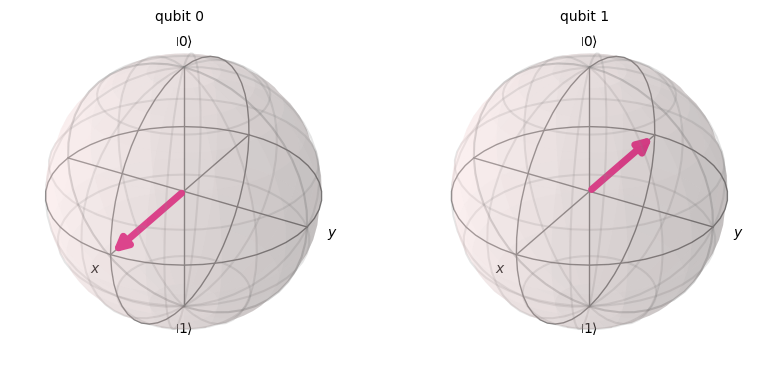

State after applying the constant oracle:


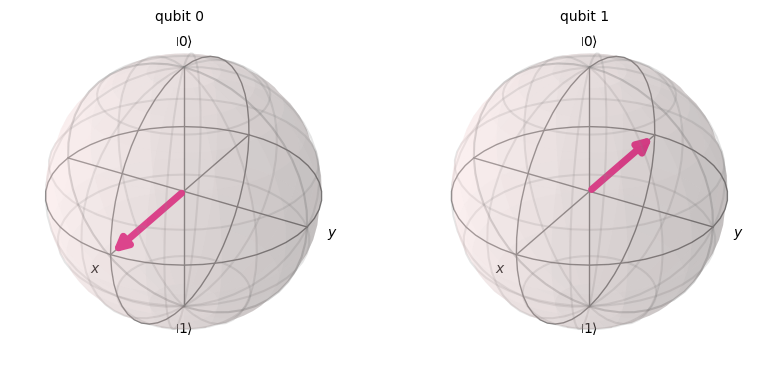

State after applying Hadamard to the first qubit:


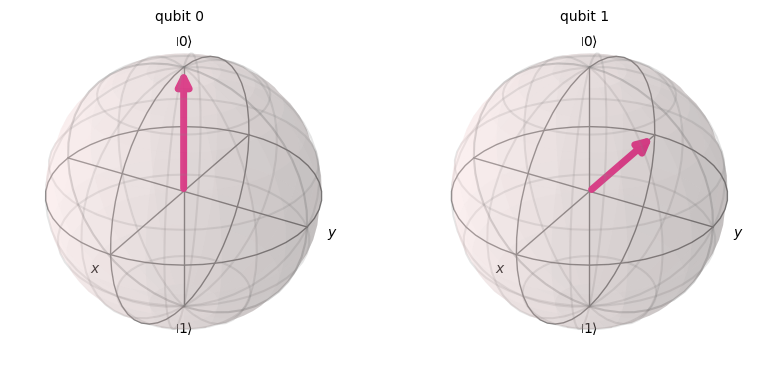

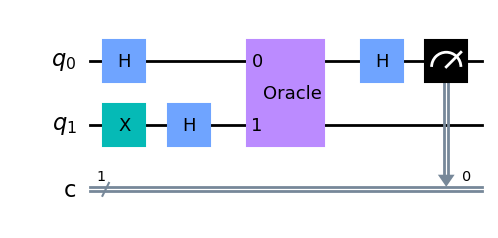

Initial state:


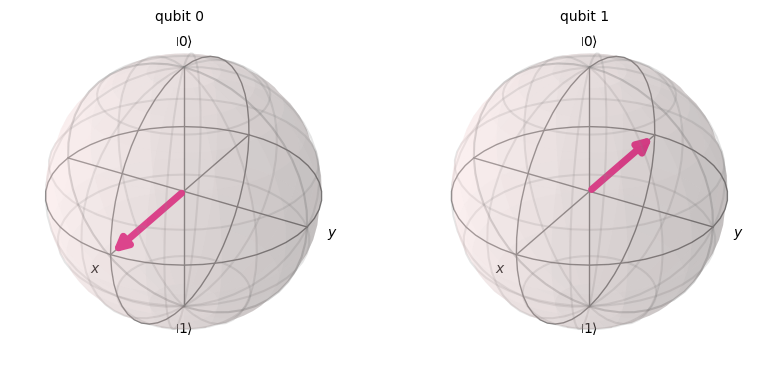

State after applying the balanced oracle:


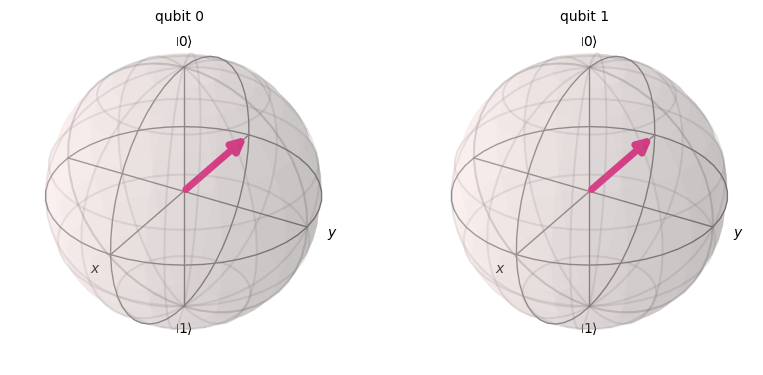

State after applying Hadamard to the first qubit:


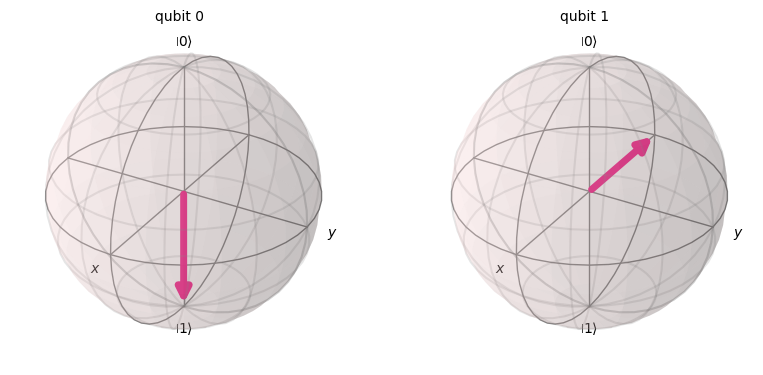

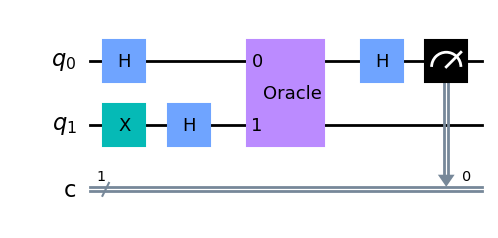

Constant Oracle Result: {'0': 1}
Balanced Oracle Result: {'1': 1}


In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector

# Define the oracle function
def oracle(case="balanced"):
    qc = QuantumCircuit(2)
    if case == "balanced":
        qc.cx(0, 1)
    # For a constant oracle, we do nothing
    return qc.to_gate(label="Oracle")

# Create the Deutsch-Jozsa circuit
def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Prepare the initial state and visualize
    qc.x(1)
    qc.h([0, 1])
    state = Statevector.from_instruction(qc)
    print("Initial state:")
    display(plot_bloch_multivector(state))

    # Apply the oracle and visualize
    qc.append(oracle(oracle_type), [0, 1])
    state = Statevector.from_instruction(qc)
    print(f"State after applying the {oracle_type} oracle:")
    display(plot_bloch_multivector(state))

    # Apply Hadamard to the first qubit and visualize
    qc.h(0)
    state = Statevector.from_instruction(qc)
    print("State after applying Hadamard to the first qubit:")
    display(plot_bloch_multivector(state))

    # Measure
    qc.measure(0, 0)
    display(qc.draw('mpl')) # Draw the circuit

    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for both constant and balanced oracles
constant_result = deutsch_algorithm('constant')
balanced_result = deutsch_algorithm('balanced')

print(f"Constant Oracle Result: {constant_result}")
print(f"Balanced Oracle Result: {balanced_result}")


The "1" at the beginning of the "C" line indicates the initial value of the classical bit. Classical bits in quantum circuits can be initialized to either 0 or 1. In this case, the classical bit is initialized to 1.

At the end of the line:

- The "1" next to the measurement symbol shows the position of the classical bit where the measurement result of the qubit will be stored. In this case, it’s indicating that the measurement result of the qubit should be stored in the first position of the classical register.

- The "0" at the very end of the line represents the final measured value of the qubit, which is the output of the algorithm. After the measurement, the classical bit holds the value of 0 or 1 based on the state of the qubit at the time of measurement.

So, in this circuit, the classical register is initialized with the value 1, and after executing the algorithm, it holds the measurement result, which is 0 in this case. This measurement result is what you use to determine whether the function in the oracle is constant or balanced.

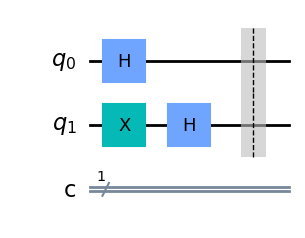

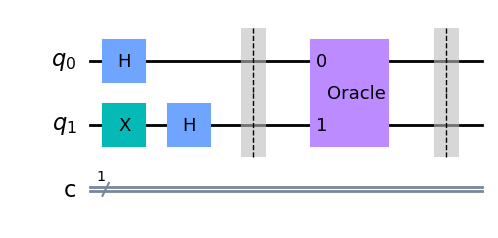

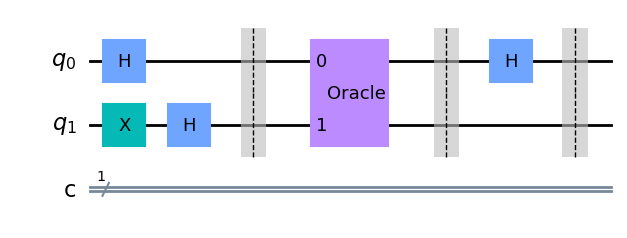

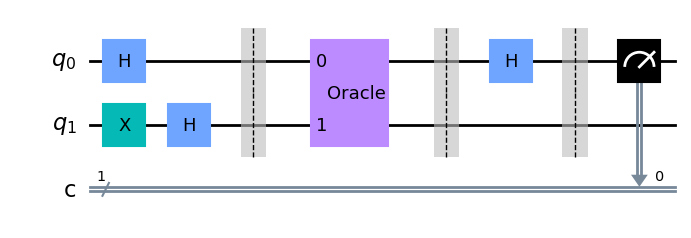

Result: {'0': 1}


In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram

def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Prepare the initial state and visualize
    qc.x(1)
    qc.h([0, 1])
    qc.barrier()  # Adds a barrier for visualization purposes
    display(qc.draw('mpl'))
    
    # Step 2: Apply the oracle and visualize
    qc.append(oracle(oracle_type), [0, 1])
    qc.barrier()  # Adds a barrier for visualization purposes
    display(qc.draw('mpl'))
    
    # Step 3: Apply Hadamard to the first qubit and visualize
    qc.h(0)
    qc.barrier()  # Adds a barrier for visualization purposes
    display(qc.draw('mpl'))
    
    # Step 4: Measure
    qc.measure(0, 0)
    display(qc.draw('mpl'))  # Final circuit visualization
    
    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for one type of oracle, either 'constant' or 'balanced'
result = deutsch_algorithm('constant')
print(f"Result: {result}")


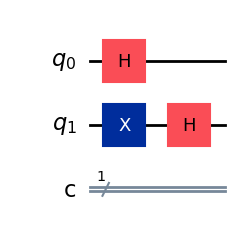

Step 1: Initial State Preparation


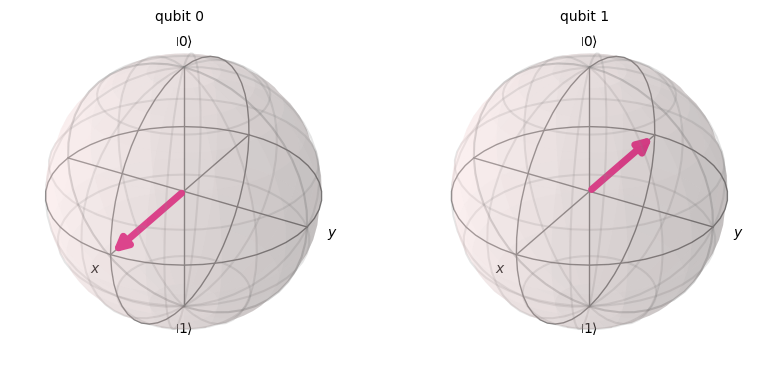

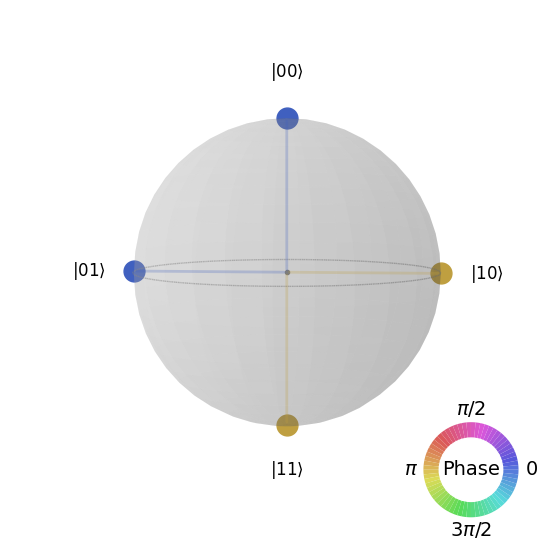

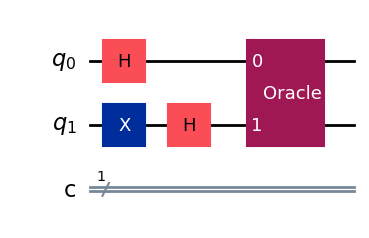

Step 2: Applying the Constant Oracle


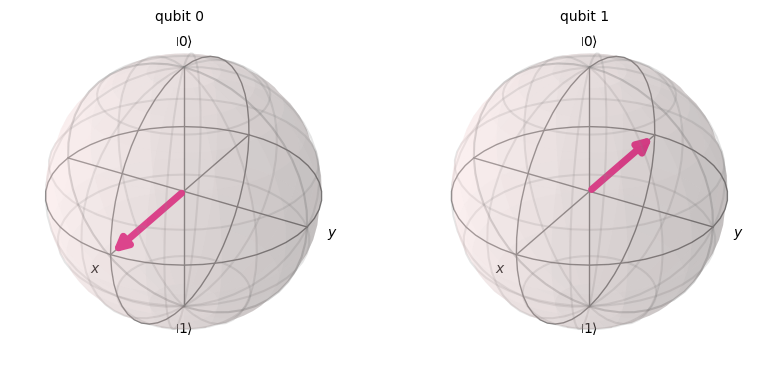

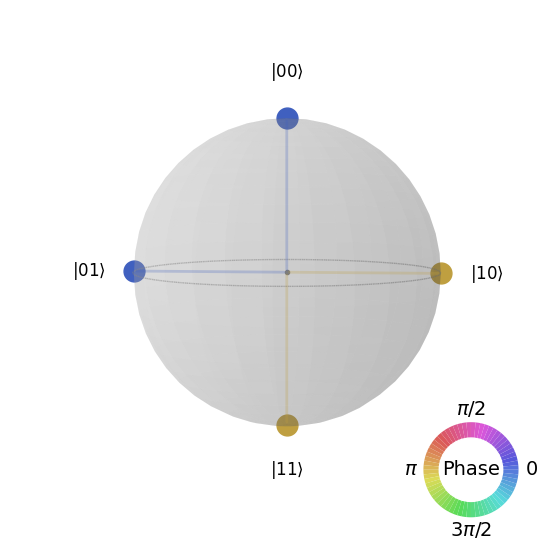

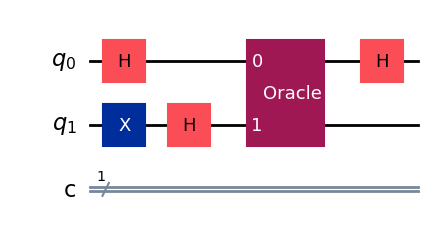

Step 3: Applying Hadamard Gate to the First Qubit


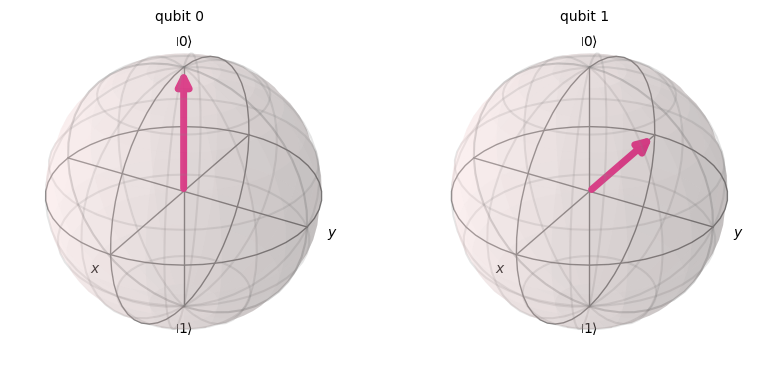

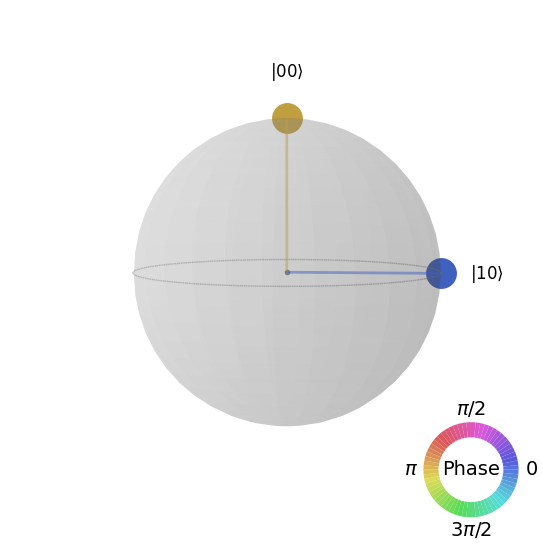

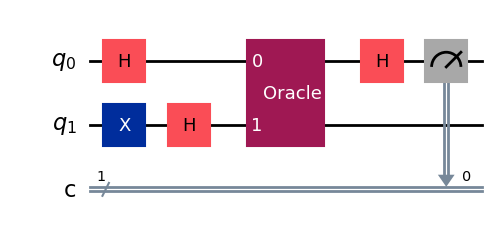

Step 4: Measurement
Result: {'0': 1}


In [22]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Prepare the initial state and visualize
    qc.x(1)
    qc.h([0, 1])
    display(qc.draw('mpl', style='iqx'))  # Draw the circuit
    print("Step 1: Initial State Preparation")
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    display(plot_bloch_multivector(state))  # Bloch sphere visualization
    display(plot_state_qsphere(state))  # Q-sphere visualization
    
    # Step 2: Apply the oracle and visualize
    qc.append(oracle(oracle_type), [0, 1])
    display(qc.draw('mpl', style='iqx'))  # Draw the circuit
    print(f"Step 2: Applying the {oracle_type.capitalize()} Oracle")
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    display(plot_bloch_multivector(state))  # Bloch sphere visualization
    display(plot_state_qsphere(state))  # Q-sphere visualization
    
    # Step 3: Apply Hadamard to the first qubit and visualize
    qc.h(0)
    display(qc.draw('mpl', style='iqx'))  # Draw the circuit
    print("Step 3: Applying Hadamard Gate to the First Qubit")
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    display(plot_bloch_multivector(state))  # Bloch sphere visualization
    display(plot_state_qsphere(state))  # Q-sphere visualization
    
    # Step 4: Measure
    qc.measure(0, 0)
    display(qc.draw('mpl', style='iqx'))  # Draw the circuit
    print("Step 4: Measurement")
    
    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for one type of oracle, either 'constant' or 'balanced'
result = deutsch_algorithm('constant')
print(f"Result: {result}")


In [17]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import array_to_latex

def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Prepare the initial state and visualize
    qc.x(1)
    qc.h([0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("Step 1: State after initial preparation")
    display(array_to_latex(state))  # Display statevector in Dirac notation
    
    # Step 2: Apply the oracle and visualize
    qc.append(oracle(oracle_type), [0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("\nStep 2: State after applying the Oracle")
    display(array_to_latex(state))  # Display statevector in Dirac notation
    
    # Step 3: Apply Hadamard to the first qubit and visualize
    qc.h(0)
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("\nStep 3: State after applying Hadamard Gate to the first qubit")
    display(array_to_latex(state))  # Display statevector in Dirac notation
    
    # Step 4: Measure
    qc.measure(0, 0)
    
    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for a balanced oracle
result = deutsch_algorithm('balanced')
print(f"\nMeasurement Result: {result}")


Step 1: State after initial preparation


<IPython.core.display.Latex object>


Step 2: State after applying the Oracle


<IPython.core.display.Latex object>


Step 3: State after applying Hadamard Gate to the first qubit


<IPython.core.display.Latex object>


Measurement Result: {'1': 1}


In [19]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import array_to_latex

# Define the oracle for a constant function
def oracle(case="constant"):
    qc = QuantumCircuit(2)
    if case == "constant":
        pass  # For a constant oracle, we do nothing
    return qc.to_gate(label="Oracle")

def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Prepare the initial state and visualize
    qc.x(1)
    qc.h([0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("Step 1: State after initial preparation")
    display(array_to_latex(state))  # Display statevector in Dirac notation
    
    # Step 2: Apply the oracle and visualize
    qc.append(oracle(oracle_type), [0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("\nStep 2: State after applying the Oracle")
    display(array_to_latex(state))  # Display statevector in Dirac notation
    
    # Step 3: Apply Hadamard to the first qubit and visualize
    qc.h(0)
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("\nStep 3: State after applying Hadamard Gate to the first qubit")
    display(array_to_latex(state))  # Display statevector in Dirac notation
    
    # Step 4: Measure
    qc.measure(0, 0)
    
    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for a constant oracle
result = deutsch_algorithm('constant')
print(f"\nMeasurement Result: {result}")


Step 1: State after initial preparation


<IPython.core.display.Latex object>


Step 2: State after applying the Oracle


<IPython.core.display.Latex object>


Step 3: State after applying Hadamard Gate to the first qubit


<IPython.core.display.Latex object>


Measurement Result: {'0': 1}


In [14]:
from qiskit import QuantumCircuit, Aer, execute

def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Prepare the initial state and visualize
    qc.x(1)
    qc.h([0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("Step 1: State after initial preparation\n", state)
    
    # Step 2: Apply the oracle and visualize
    qc.append(oracle(oracle_type), [0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print(f"\nStep 2: State after applying the {oracle_type.capitalize()} Oracle\n", state)
    
    # Step 3: Apply Hadamard to the first qubit and visualize
    qc.h(0)
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("\nStep 3: State after applying Hadamard Gate to the first qubit\n", state)
    
    # Step 4: Measurement
    qc.measure(0, 0)
    
    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for a balanced oracle
result = deutsch_algorithm('balanced')
print(f"\nMeasurement Result: {result}")


Step 1: State after initial preparation
 Statevector([ 0.5+0.000000e+00j,  0.5+0.000000e+00j, -0.5-6.123234e-17j,
             -0.5-6.123234e-17j],
            dims=(2, 2))

Step 2: State after applying the Balanced Oracle
 Statevector([-0.5-6.123234e-17j,  0.5+0.000000e+00j,  0.5+0.000000e+00j,
             -0.5-6.123234e-17j],
            dims=(2, 2))

Step 3: State after applying Hadamard Gate to the first qubit
 Statevector([ 0.        -8.65956056e-17j, -0.70710678+6.16297582e-33j,
              0.        +6.16297582e-33j,  0.70710678-6.16297582e-33j],
            dims=(2, 2))

Measurement Result: {'1': 1}


Step 1: State after initial preparation


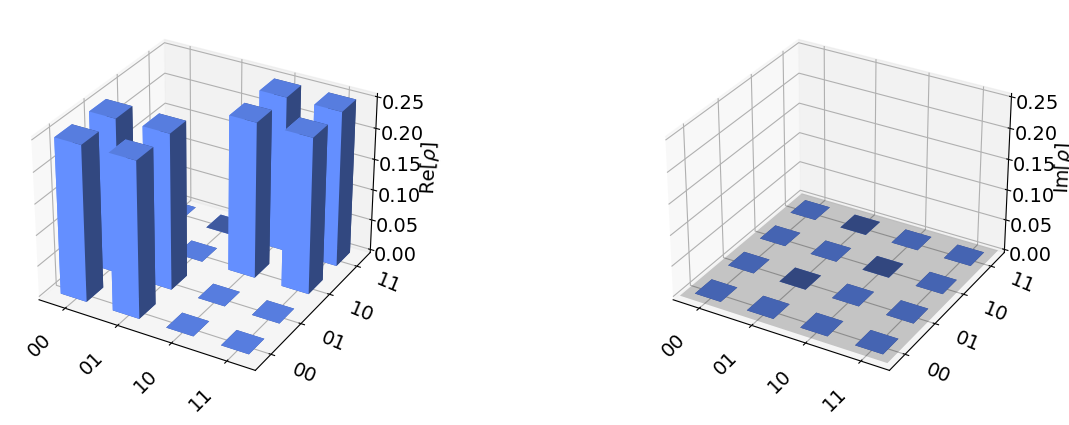


Step 2: State after applying the Oracle


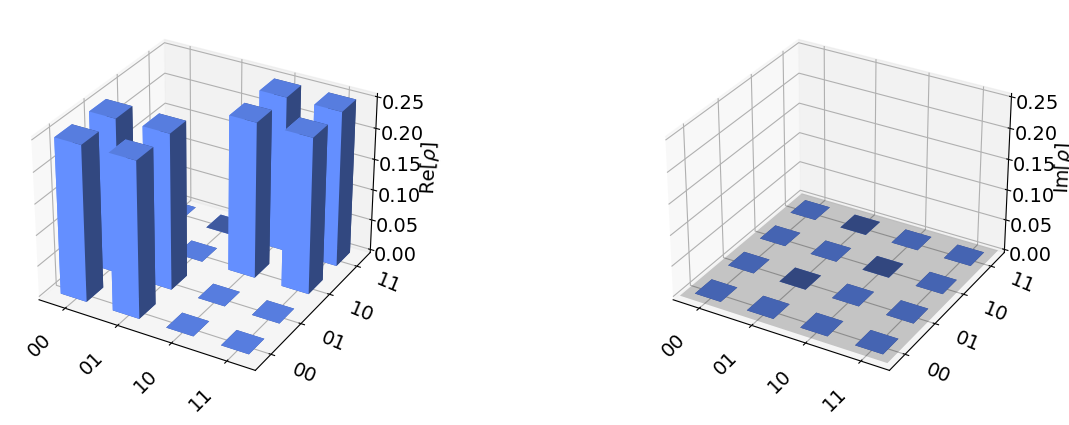


Step 3: State after applying Hadamard Gate to the first qubit


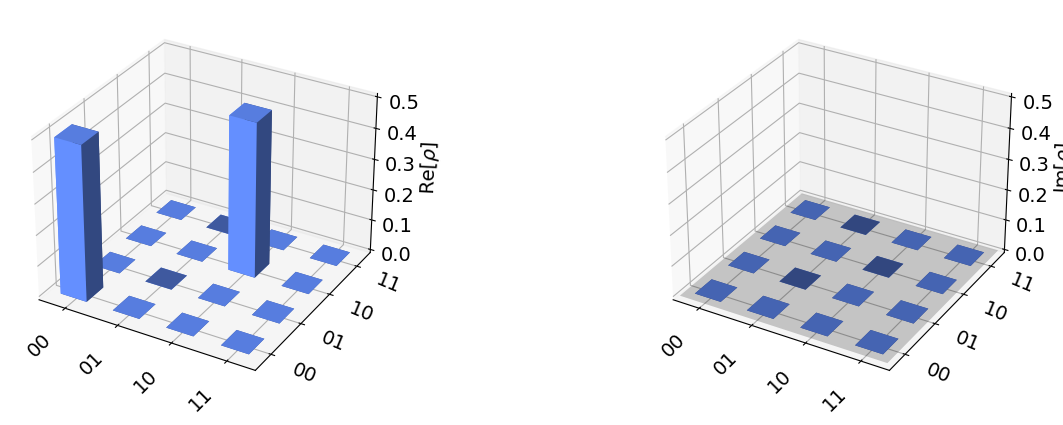


Measurement Result: {'0': 1}


In [20]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_state_city  # Importing the visualization function

def deutsch_algorithm(oracle_type):
    # Initialize a 2 qubit circuit
    qc = QuantumCircuit(2, 1)
    
    # Step 1: Prepare the initial state and visualize
    qc.x(1)
    qc.h([0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("Step 1: State after initial preparation")
    display(plot_state_city(state))  # Display probabilities and phases
    
    # Step 2: Apply the oracle and visualize
    qc.append(oracle(oracle_type), [0, 1])
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("\nStep 2: State after applying the Oracle")
    display(plot_state_city(state))  # Display probabilities and phases
    
    # Step 3: Apply Hadamard to the first qubit and visualize
    qc.h(0)
    state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
    print("\nStep 3: State after applying Hadamard Gate to the first qubit")
    display(plot_state_city(state))  # Display probabilities and phases
    
    # Step 4: Measure
    qc.measure(0, 0)
    
    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1).result()
    counts = result.get_counts()
    
    return counts

# Run the algorithm for a balanced oracle
result = deutsch_algorithm('balanced')
print(f"\nMeasurement Result: {result}")
